In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 선형회귀 실습 코드 : x값이 하나인 선형회귀
# 출처: https://limitt.tistory.com/154 [Unlimited:티스토리]
height = np.array([183,150,180,197,160,175])
height=height.reshape(-1,1) #2차원값이 들어가야 해서, 행백터를 열백터로 변환시켜줌
math=np.array([85,45,80,99,45,75])
height

array([[183],
       [150],
       [180],
       [197],
       [160],
       [175]])

[1.27957242]
-151.35886291554093


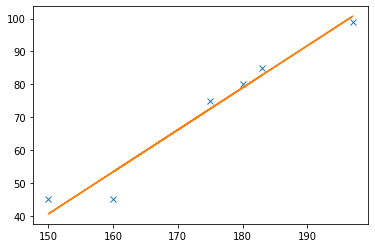

In [ ]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(height,math)
print(line_fitter.coef_)  # 기울기 저장
print(line_fitter.intercept_)  # 절편을 저장

score_predict = line_fitter.predict(height) #키를 가지고 예측하겠다
plt.plot(height,math,'x')
plt.plot(height, score_predict)
plt.show()

In [ ]:
import statsmodels.api as sm
 
#define response variable
y = math
 
#define predictor variables
x = height
 
#add constant to predictor variables
x = sm.add_constant(x)
 
#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     88.98
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           0.000704
Time:                        05:25:34   Log-Likelihood:                -17.084
No. Observations:                   6   AIC:                             38.17
Df Residuals:                       4   BIC:                             37.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -151.3589     23.718     -6.382      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


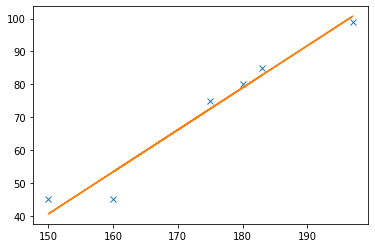

In [ ]:
plt.plot(height,math,'x')
plt.plot(height, model.predict(x))
plt.show()

In [ ]:
# https://www.datarobot.com/blog/multiple-regression-using-statsmodels/
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
df_adv = pd.read_csv('https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0) 
X = df_adv[['TV', 'Radio']] 
y = df_adv['Sales'] 
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales'] 
## fit a OLS model with intercept on TV and Radio 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.83e-98
Time:                        05:38:10   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# import formula api as alias smf 
import statsmodels.formula.api as smf 
# formula: response ~ predictor + predictor 
est = smf.ols(formula='Sales ~ TV + Radio', data=df_adv).fit()

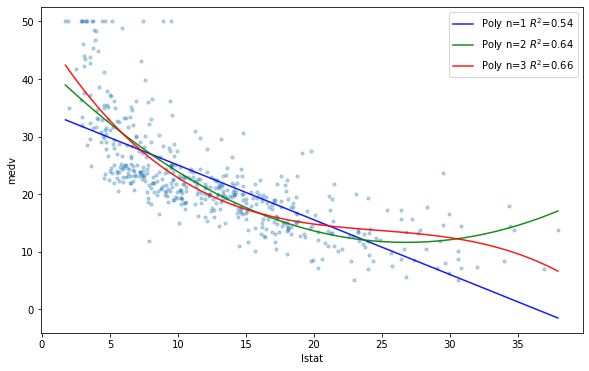

In [ ]:
# load the boston housing dataset - median house values in the Boston area
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')

# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# points linearlyd space on lstats
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 + lstat', data=df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,
alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0)', data=df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared,
alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', alpha=0.9,
label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


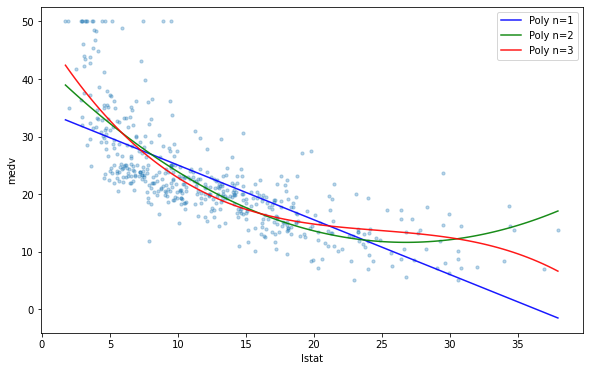

In [ ]:
import array
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()

# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# points linearlyd space on lstats
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})
x2 = np.hstack([x.values,  np.power(x.values, 2)])
x3 = np.hstack([x.values,  np.power(x.values, 2),  np.power(x.values, 3)])

# 1-st order polynomial
poly_1 = line_fitter.fit(df["lstat"].values.reshape(-1, 1), df["medv"])
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1',
alpha=0.9)

# 2-nd order polynomial
arr = df["lstat"].values.reshape(-1, 1)
arr = np.hstack([arr, np.power(arr, 2)])
poly_2 = line_fitter.fit(arr, df["medv"])
plt.plot(x.lstat, poly_2.predict(x2), 'g-', label='Poly n=2', alpha=0.9)

# 3-rd order polynomial
arr = df["lstat"].values.reshape(-1, 1)
arr = np.hstack([arr, np.power(arr, 2), np.power(arr, 3)])
poly_3 = line_fitter.fit(arr, df["medv"])
plt.plot(x.lstat, poly_3.predict(x3), 'r-', alpha=0.9, label='Poly n=3')

plt.legend();